In [1]:
pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=9a9a40efb78e407e5083b132b4791a65689000e32962febc34f89599c54b8250
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import datetime
import pandas_ta as ta

In [3]:
a=dir(ta)
print(a)

['ALL_PATTERNS', 'AllStrategy', 'AnalysisIndicators', 'BasePandasObject', 'CANGLE_AGG', 'CDL_PATTERN_NAMES', 'Category', 'CommonStrategy', 'DataFrame', 'DistributionNotFound', 'EXCHANGE_TZ', 'Imports', 'List', 'Optional', 'PandasObject', 'Path', 'Pool', 'RATE', 'Series', 'Strategy', 'Timedelta', 'Timestamp', 'Tuple', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_dist', 'aberration', 'above', 'above_value', 'accbands', 'ad', 'adosc', 'adx', 'alma', 'alphavantage', 'amat', 'ao', 'aobv', 'apo', 'argmax', 'argmin', 'aroon', 'atr', 'av', 'bbands', 'below', 'below_value', 'bias', 'bop', 'brar', 'cagr', 'calmar_ratio', 'candle_color', 'candles', 'category_files', 'cci', 'cdl', 'cdl_doji', 'cdl_inside', 'cdl_pattern', 'cdl_z', 'cfo', 'cg', 'chop', 'cksp', 'cmf', 'cmo', 'combination', 'coppock', 'core', 'cpu_count', 'cross', 'cross_value', 'cti', 'cycles', 'data', 'dataclass', 'datetime', 'decay', 'decreasi

In [4]:
# Download the data
ticker = "^NSEI"
data = yf.download(ticker, period="1mo", interval="30m")

[*********************100%%**********************]  1 of 1 completed


In [5]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,23574.750000,0
2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,23595.699219,0
2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,23603.800781,0
2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,23573.250000,0
2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,23588.400391,0


In [6]:
# Reset the index to add the dates as a column
data_reset = data.reset_index()

In [7]:
print(data_reset.head())

             Datetime          Open          High           Low         Close  \
0 2024-06-25 09:30:00  23579.750000  23617.550781  23574.250000  23574.750000   
1 2024-06-25 10:00:00  23574.400391  23604.400391  23565.849609  23595.699219   
2 2024-06-25 10:30:00  23593.949219  23610.900391  23587.250000  23603.800781   
3 2024-06-25 11:00:00  23603.800781  23605.449219  23562.199219  23573.250000   
4 2024-06-25 11:30:00  23572.949219  23593.349609  23566.349609  23588.400391   

      Adj Close  Volume  
0  23574.750000       0  
1  23595.699219       0  
2  23603.800781       0  
3  23573.250000       0  
4  23588.400391       0  


In [8]:
data=data_reset[["Datetime","Open","High","Low","Close","Volume"]]
data.head()

,Datetime,Open,High,Low,Close,Volume
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0


In [9]:
# if you face frombole with data - you should chage date time zone .
#https://youtu.be/Qs1RwCfo8uY?si=PD885W1QjX7mVCOF  video reference

# ****Moving Average 20 ****



In [10]:
#moving average  - 20
data["20_ma"]=data["Close"].rolling(window=20).mean()

In [11]:
data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0,NaN
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0,NaN
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0,NaN
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0,NaN
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0,NaN


<Axes: >

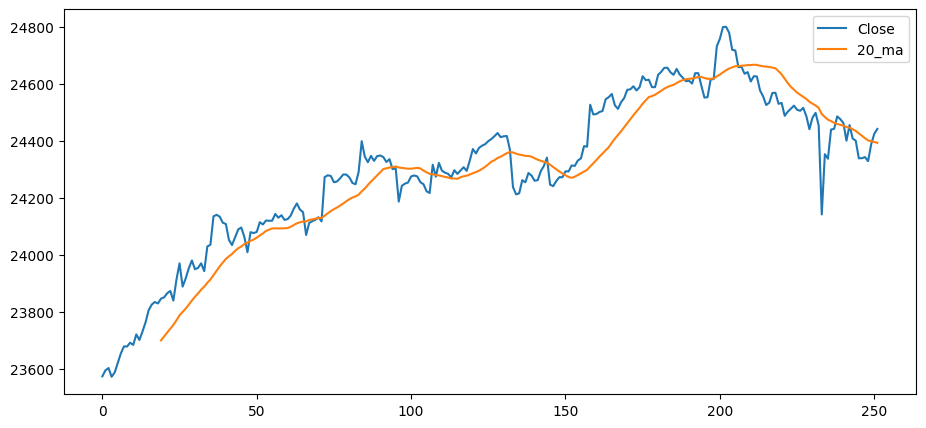

In [12]:
data[["Close","20_ma"]].plot(figsize=(11,5))

In [13]:
#20_ma having initial values nan we need to remove it
ma_data=data.dropna()

In [14]:
data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0,NaN
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0,NaN
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0,NaN
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0,NaN
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0,NaN


In [15]:
ma_data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma
19,2024-06-26 13:00:00,23831.400391,23858.550781,23803.800781,23847.099609,0,23700.807617
20,2024-06-26 13:30:00,23846.250000,23863.650391,23838.849609,23851.699219,0,23714.655078
21,2024-06-26 14:00:00,23851.849609,23880.099609,23849.949219,23866.000000,0,23728.170117
22,2024-06-26 14:30:00,23865.349609,23884.849609,23857.000000,23874.050781,0,23741.682617
23,2024-06-26 15:00:00,23873.349609,23889.650391,23839.599609,23840.250000,0,23755.032617


In [16]:
ma_data.tail(10)

,Datetime,Open,High,Low,Close,Volume,20_ma
242,2024-07-24 10:30:00,24401.150391,24492.099609,24401.150391,24455.500000,0,24446.325098
243,2024-07-24 11:00:00,24454.750000,24469.900391,24405.500000,24408.300781,0,24441.080176
244,2024-07-24 11:30:00,24408.400391,24438.800781,24384.150391,24400.900391,0,24434.952734
245,2024-07-24 12:00:00,24401.250000,24410.849609,24307.949219,24339.099609,0,24426.442676
246,2024-07-24 12:30:00,24339.250000,24350.199219,24312.199219,24339.400391,0,24418.130176
247,2024-07-24 13:00:00,24339.949219,24364.449219,24329.650391,24343.300781,0,24409.500195
248,2024-07-24 13:30:00,24342.500000,24378.099609,24315.400391,24329.050781,0,24401.602734
249,2024-07-24 14:00:00,24329.500000,24389.250000,24310.500000,24388.050781,0,24398.957813
250,2024-07-24 14:30:00,24387.150391,24453.949219,24386.900391,24424.800781,0,24396.107812
251,2024-07-24 15:00:00,24425.699219,24446.400391,24380.250000,24441.900391,0,24393.285352


In [17]:
pip install pandas mplfinance


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.1 MB/s eta 0:00:00


In [18]:
import mplfinance as mpf

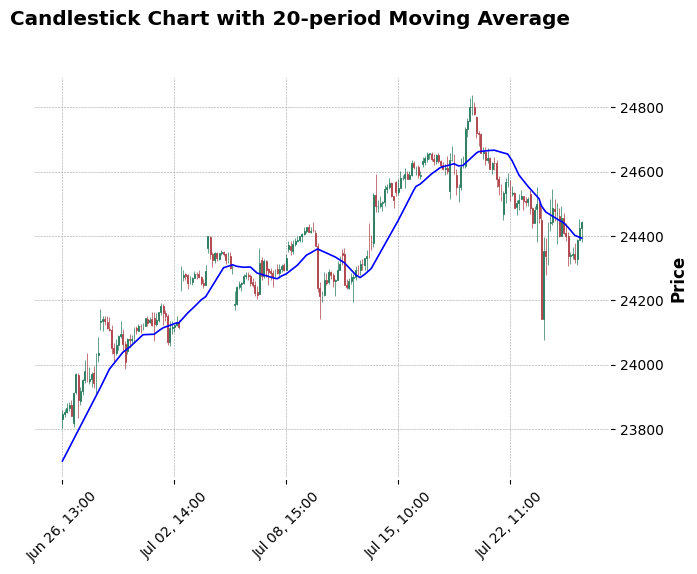

In [19]:


df = pd.DataFrame(ma_data)
df.set_index('Datetime', inplace=True)

# Define the moving average
add_plot = [
    mpf.make_addplot(df['20_ma'], color='blue', width=1.2)
]

# Plot the candlestick chart
mpf.plot(df, type='candle', style='charles', addplot=add_plot, title='Candlestick Chart with 20-period Moving Average', ylabel='Price')

# **Bolinger band**

In [20]:
#Bolinger bands indicator
# middle line is 20 moving avg
#upper and lower 2 standerd deviation up and dowun from moving average


In [21]:
#WE all ready have# # Calculate the 20-period Simple Moving Average (SMA)
# data['SMA'] = data['Close'].rolling(window=20).mean()

# # Calculate the 20-period Standard Deviation (SD)
# data['SD'] = data['Close'].rolling(window=20).std()
# directly calculating into UB and LB


# Calculate the Upper Bollinger Band (UB) and Lower Bollinger Band (LB)
data['UB'] = data['20_ma'] + 2 * data['Close'].rolling(window=20).std()
data['LB'] = data['20_ma'] - 2 * data['Close'].rolling(window=20).std()

In [22]:
data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0,NaN,NaN,NaN
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0,NaN,NaN,NaN
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0,NaN,NaN,NaN
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0,NaN,NaN,NaN
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0,NaN,NaN,NaN


In [23]:
BB_Data=data.dropna()

In [24]:
data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0,NaN,NaN,NaN
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0,NaN,NaN,NaN
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0,NaN,NaN,NaN
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0,NaN,NaN,NaN
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0,NaN,NaN,NaN


In [25]:
BB_Data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB
19,2024-06-26 13:00:00,23831.400391,23858.550781,23803.800781,23847.099609,0,23700.807617,23886.253196,23515.362038
20,2024-06-26 13:30:00,23846.250000,23863.650391,23838.849609,23851.699219,0,23714.655078,23901.819800,23527.490356
21,2024-06-26 14:00:00,23851.849609,23880.099609,23849.949219,23866.000000,0,23728.170117,23918.182400,23538.157835
22,2024-06-26 14:30:00,23865.349609,23884.849609,23857.000000,23874.050781,0,23741.682617,23932.888681,23550.476554
23,2024-06-26 15:00:00,23873.349609,23889.650391,23839.599609,23840.250000,0,23755.032617,23933.588453,23576.476781


<Axes: >

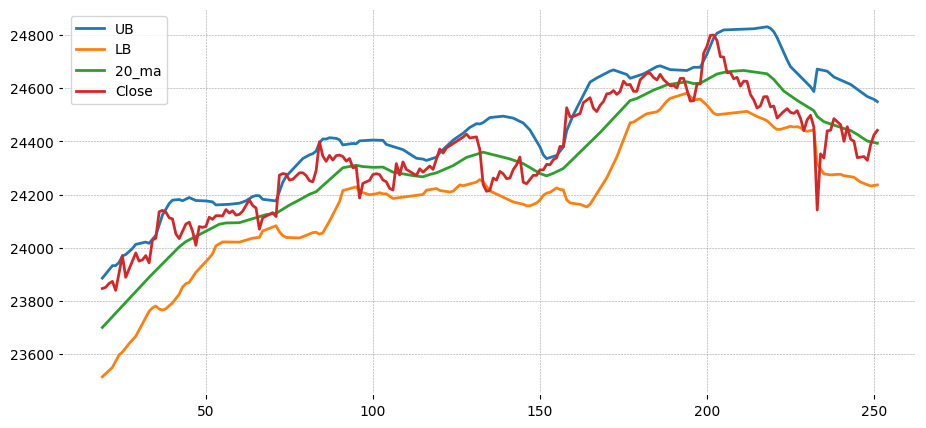

In [26]:
BB_Data[["UB","LB","20_ma","Close"]].plot(figsize=(11,5))

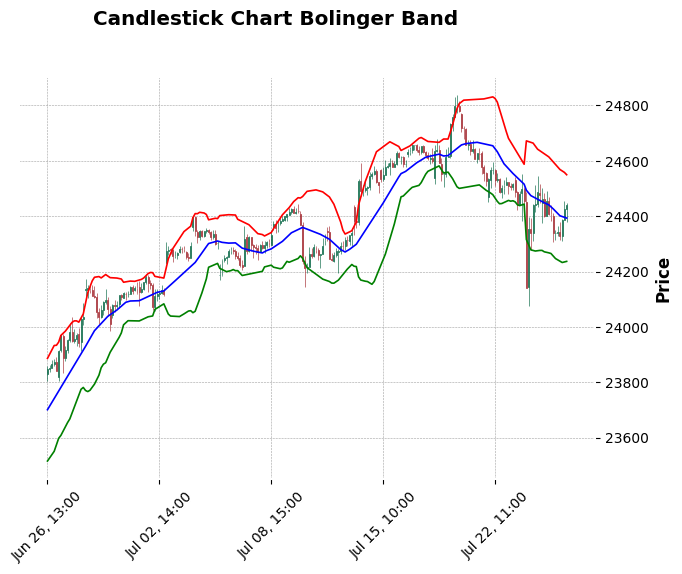

In [27]:
df = pd.DataFrame(BB_Data)
df.set_index('Datetime', inplace=True)

# Define the moving average
add_plot = [
    mpf.make_addplot(df['20_ma'], color='blue', width=1.2),
    mpf.make_addplot(df['UB'], color='red', width=1.2),
    mpf.make_addplot(df['LB'], color='green', width=1.2)
]

# Plot the candlestick chart
mpf.plot(df, type='candle', style='charles', addplot=add_plot, title='Candlestick Chart Bolinger Band', ylabel='Price')

# **Super trend**

In [28]:
#Super trend
help(ta.supertrend)

Help on function supertrend in module pandas_ta.overlap.supertrend:

supertrend(high, low, close, length=None, multiplier=None, offset=None, **kwargs)
    Supertrend (supertrend)
    
    Supertrend is an overlap indicator. It is used to help identify trend
    direction, setting stop loss, identify support and resistance, and/or
    generate buy & sell signals.
    
    Sources:
        http://www.freebsensetips.com/blog/detail/7/What-is-supertrend-indicator-its-calculation
    
    Calculation:
        Default Inputs:
            length=7, multiplier=3.0
        Default Direction:
            Set to +1 or bullish trend at start
    
        MID = multiplier * ATR
        LOWERBAND = HL2 - MID
        UPPERBAND = HL2 + MID
    
        if UPPERBAND[i] < FINAL_UPPERBAND[i-1] and close[i-1] > FINAL_UPPERBAND[i-1]:
            FINAL_UPPERBAND[i] = UPPERBAND[i]
        else:
            FINAL_UPPERBAND[i] = FINAL_UPPERBAND[i-1])
    
        if LOWERBAND[i] > FINAL_LOWERBAND[i-1] and clos

In [29]:
data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0,NaN,NaN,NaN
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0,NaN,NaN,NaN
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0,NaN,NaN,NaN
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0,NaN,NaN,NaN
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0,NaN,NaN,NaN


In [30]:
s_t= ta.supertrend(data['High'],data['Low'],data['Close'],length=10,multiplier=3)

In [31]:
s_t.head()

,SUPERT_10_3.0,SUPERTd_10_3.0,SUPERTl_10_3.0,SUPERTs_10_3.0
0,0.0,1,NaN,NaN
1,NaN,1,NaN,NaN
2,NaN,1,NaN,NaN
3,NaN,1,NaN,NaN
4,NaN,1,NaN,NaN


In [32]:
s_t.tail()

,SUPERT_10_3.0,SUPERTd_10_3.0,SUPERTl_10_3.0,SUPERTs_10_3.0
247,24579.835376,-1,NaN,24579.835376
248,24579.835376,-1,NaN,24579.835376
249,24579.835376,-1,NaN,24579.835376
250,24579.835376,-1,NaN,24579.835376
251,24579.835376,-1,NaN,24579.835376


In [33]:
data= pd.concat([data,s_t["SUPERT_10_3.0"]],axis=1)

In [34]:
data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0,NaN,NaN,NaN,0.0
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0,NaN,NaN,NaN,NaN
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0,NaN,NaN,NaN,NaN
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0,NaN,NaN,NaN,NaN
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0,NaN,NaN,NaN,NaN


In [35]:
# # Convert 'Datetime' column to datetime if it's not already in datetime format
# data['Datetime'] = pd.to_datetime(data['Datetime'])
# data.set_index('Datetime', inplace=True)

In [36]:
data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0,NaN,NaN,NaN,0.0
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0,NaN,NaN,NaN,NaN
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0,NaN,NaN,NaN,NaN
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0,NaN,NaN,NaN,NaN
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0,NaN,NaN,NaN,NaN


In [37]:
# prompt: % count of na values

data.isna().sum()


Datetime          0
Open              0
High              0
Low               0
Close             0
Volume            0
20_ma            19
UB               19
LB               19
SUPERT_10_3.0     9
dtype: int64

In [38]:
s_t_data=data.dropna()

In [39]:
s_t_data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0
19,2024-06-26 13:00:00,23831.400391,23858.550781,23803.800781,23847.099609,0,23700.807617,23886.253196,23515.362038,23702.061714
20,2024-06-26 13:30:00,23846.250000,23863.650391,23838.849609,23851.699219,0,23714.655078,23901.819800,23527.490356,23722.200277
21,2024-06-26 14:00:00,23851.849609,23880.099609,23849.949219,23866.000000,0,23728.170117,23918.182400,23538.157835,23740.308777
22,2024-06-26 14:30:00,23865.349609,23884.849609,23857.000000,23874.050781,0,23741.682617,23932.888681,23550.476554,23750.775531
23,2024-06-26 15:00:00,23873.349609,23889.650391,23839.599609,23840.250000,0,23755.032617,23933.588453,23576.476781,23750.775531


<Axes: >

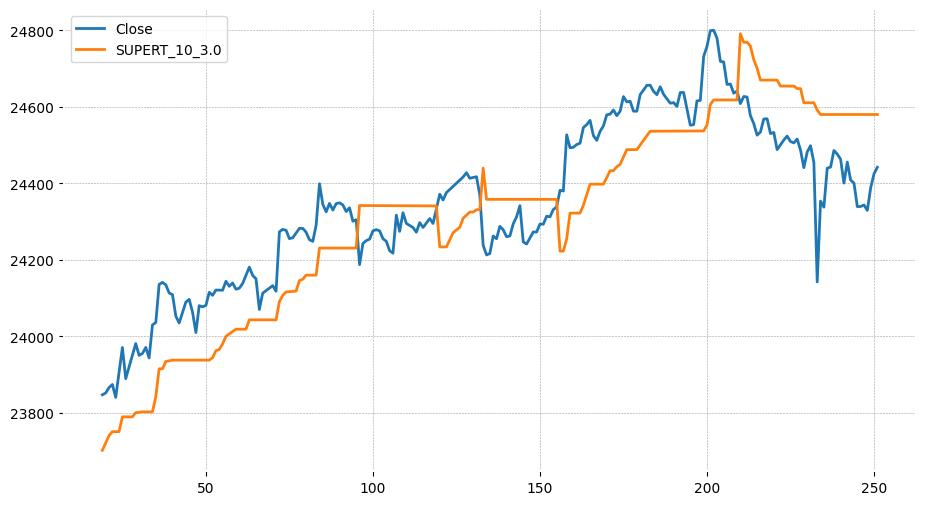

In [40]:
s_t_data[["Close","SUPERT_10_3.0"]].plot(figsize=(11,6))


In [41]:
s_t_data['Datetime'] = pd.to_datetime(s_t_data['Datetime'])

<ipython-input-41-7971b2824044>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  s_t_data['Datetime'] = pd.to_datetime(s_t_data['Datetime'])


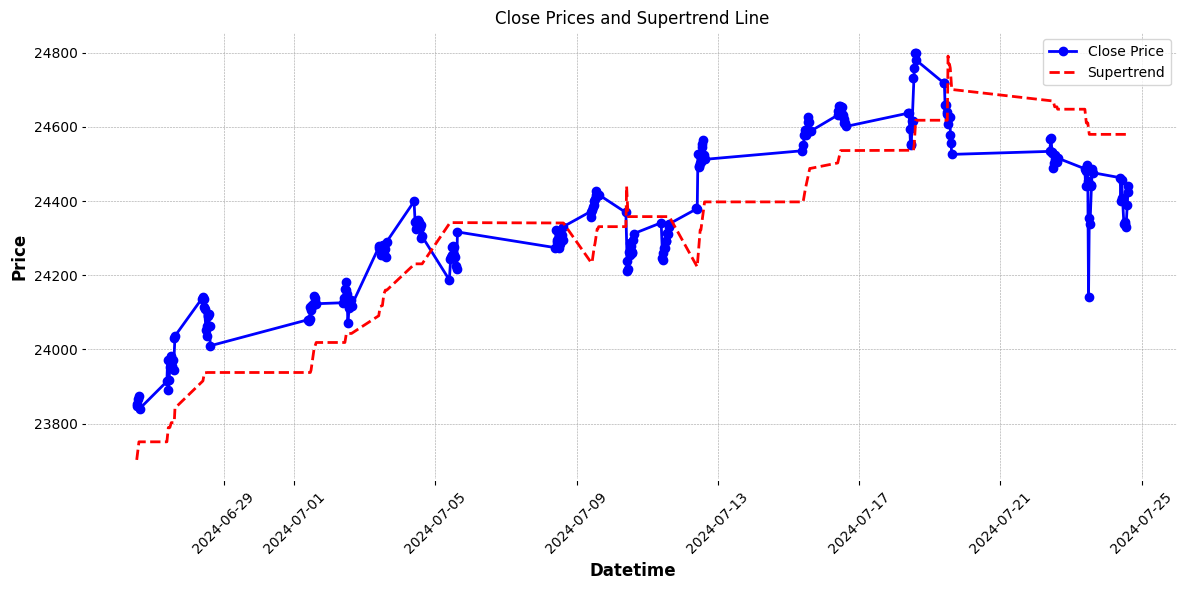

In [42]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(s_t_data['Datetime'], s_t_data['Close'], label='Close Price', color='blue', marker='o')
plt.plot(s_t_data['Datetime'], s_t_data['SUPERT_10_3.0'], label='Supertrend', color='red', linestyle='--')

# Formatting the plot
plt.title('Close Prices and Supertrend Line')
plt.xlabel('Datetime')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjusts plot to fit labels

# Show plot
plt.show()

In [43]:
s_t_data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0
19,2024-06-26 13:00:00,23831.400391,23858.550781,23803.800781,23847.099609,0,23700.807617,23886.253196,23515.362038,23702.061714
20,2024-06-26 13:30:00,23846.250000,23863.650391,23838.849609,23851.699219,0,23714.655078,23901.819800,23527.490356,23722.200277
21,2024-06-26 14:00:00,23851.849609,23880.099609,23849.949219,23866.000000,0,23728.170117,23918.182400,23538.157835,23740.308777
22,2024-06-26 14:30:00,23865.349609,23884.849609,23857.000000,23874.050781,0,23741.682617,23932.888681,23550.476554,23750.775531
23,2024-06-26 15:00:00,23873.349609,23889.650391,23839.599609,23840.250000,0,23755.032617,23933.588453,23576.476781,23750.775531


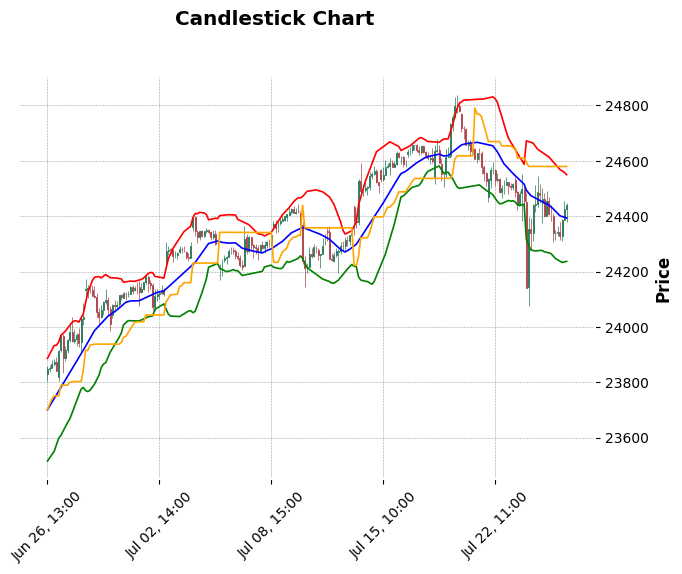

In [44]:
df = pd.DataFrame(s_t_data)
df.set_index('Datetime', inplace=True)

# Define the moving average
add_plot = [
    mpf.make_addplot(df['20_ma'], color='blue', width=1.2),
    mpf.make_addplot(df['UB'], color='red', width=1.2),
    mpf.make_addplot(df['LB'], color='green', width=1.2),
    mpf.make_addplot(df['SUPERT_10_3.0'], color='orange', width=1.2)
]

# Plot the candlestick chart
mpf.plot(df, type='candle', style='charles', addplot=add_plot, title='Candlestick Chart', ylabel='Price')


# **Relative Strength Index RSI**

In [45]:
# RSI Relative Strength Index
# avg gain and avg looses
#the RSI oscillates between zero and 100.
# we can use ta lab for this also

In [46]:
data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0,NaN,NaN,NaN,0.0
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0,NaN,NaN,NaN,NaN
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0,NaN,NaN,NaN,NaN
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0,NaN,NaN,NaN,NaN
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0,NaN,NaN,NaN,NaN


In [47]:
# data["Gain"] = data["Close"] - data["Open"].apply(lambda x: x if x > 0 else 0)
# data["Loss"] = data["Close"] - data["Open"].apply(lambda x: -x if x < 0 else 0)

In [48]:
# data["avg_gain"]= data["Gain"].rolling(window=14).mean()
# data["avg_loss"]= data["Loss"].rolling(window=14).mean()

In [49]:
# RSI_data=data.dropna()

In [50]:
data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0,NaN,NaN,NaN,0.0
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0,NaN,NaN,NaN,NaN
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0,NaN,NaN,NaN,NaN
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0,NaN,NaN,NaN,NaN
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0,NaN,NaN,NaN,NaN


In [51]:
data.tail()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0
247,2024-07-24 13:00:00,24339.949219,24364.449219,24329.650391,24343.300781,0,24409.500195,24577.186102,24241.814289,24579.835376
248,2024-07-24 13:30:00,24342.500000,24378.099609,24315.400391,24329.050781,0,24401.602734,24568.797337,24234.408132,24579.835376
249,2024-07-24 14:00:00,24329.500000,24389.250000,24310.500000,24388.050781,0,24398.957813,24565.202568,24232.713057,24579.835376
250,2024-07-24 14:30:00,24387.150391,24453.949219,24386.900391,24424.800781,0,24396.107812,24558.277130,24233.938495,24579.835376
251,2024-07-24 15:00:00,24425.699219,24446.400391,24380.250000,24441.900391,0,24393.285352,24549.829588,24236.741115,24579.835376


In [52]:
data['RSI'] = ta.rsi(data['Close'])

In [53]:
data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0,RSI
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0,NaN,NaN,NaN,0.0,NaN
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0,NaN,NaN,NaN,NaN,NaN
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0,NaN,NaN,NaN,NaN,NaN
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0,NaN,NaN,NaN,NaN,NaN
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0,NaN,NaN,NaN,NaN,NaN


In [54]:
data.tail()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0,RSI
247,2024-07-24 13:00:00,24339.949219,24364.449219,24329.650391,24343.300781,0,24409.500195,24577.186102,24241.814289,24579.835376,40.988420
248,2024-07-24 13:30:00,24342.500000,24378.099609,24315.400391,24329.050781,0,24401.602734,24568.797337,24234.408132,24579.835376,39.908870
249,2024-07-24 14:00:00,24329.500000,24389.250000,24310.500000,24388.050781,0,24398.957813,24565.202568,24232.713057,24579.835376,46.224126
250,2024-07-24 14:30:00,24387.150391,24453.949219,24386.900391,24424.800781,0,24396.107812,24558.277130,24233.938495,24579.835376,49.765506
251,2024-07-24 15:00:00,24425.699219,24446.400391,24380.250000,24441.900391,0,24393.285352,24549.829588,24236.741115,24579.835376,51.370232


In [55]:
rsi_data=data.dropna()

In [56]:
rsi_data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0,RSI
19,2024-06-26 13:00:00,23831.400391,23858.550781,23803.800781,23847.099609,0,23700.807617,23886.253196,23515.362038,23702.061714,86.223362
20,2024-06-26 13:30:00,23846.250000,23863.650391,23838.849609,23851.699219,0,23714.655078,23901.819800,23527.490356,23722.200277,86.530132
21,2024-06-26 14:00:00,23851.849609,23880.099609,23849.949219,23866.000000,0,23728.170117,23918.182400,23538.157835,23740.308777,87.464736
22,2024-06-26 14:30:00,23865.349609,23884.849609,23857.000000,23874.050781,0,23741.682617,23932.888681,23550.476554,23750.775531,87.970753
23,2024-06-26 15:00:00,23873.349609,23889.650391,23839.599609,23840.250000,0,23755.032617,23933.588453,23576.476781,23750.775531,74.392750


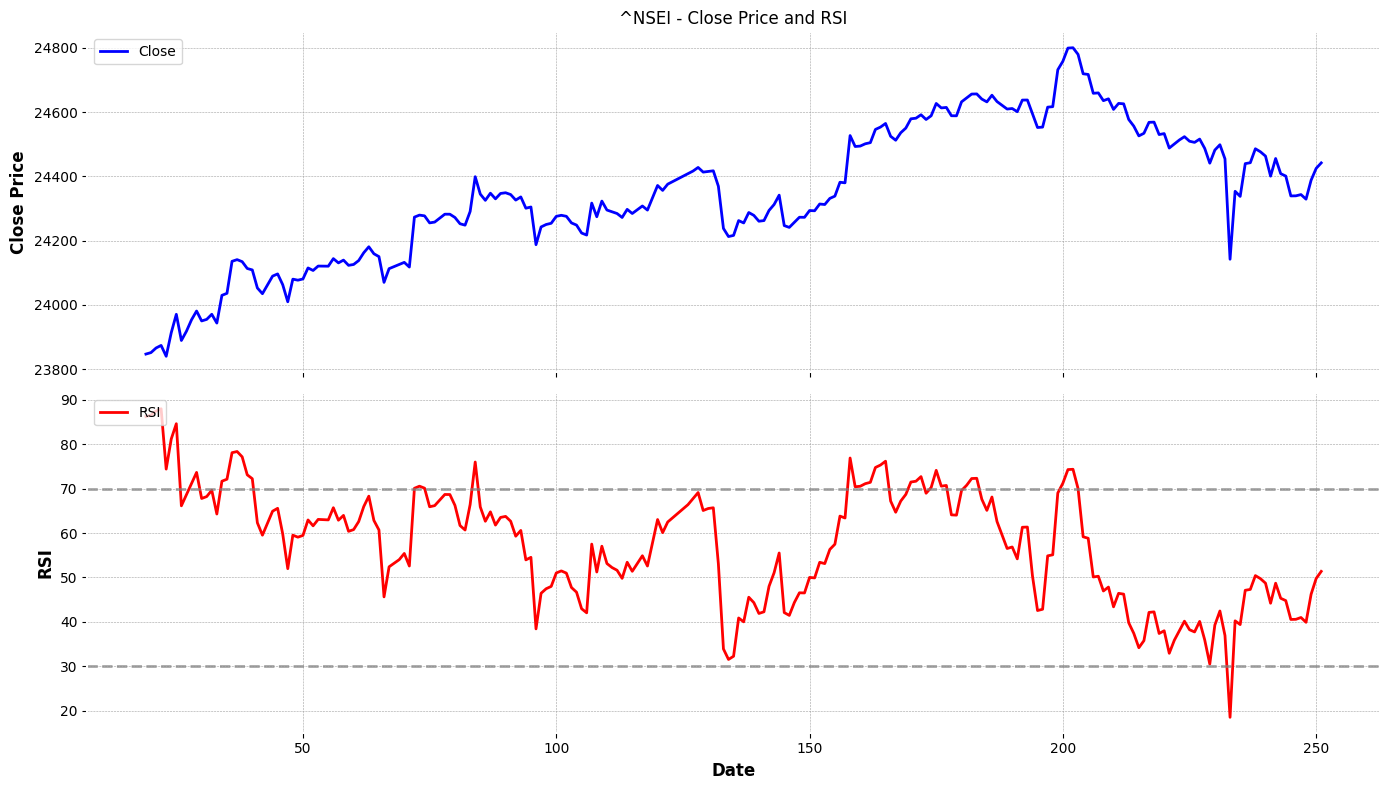

In [57]:
# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot Close prices
ax1.plot(rsi_data.index, rsi_data['Close'], label='Close', color='blue')
ax1.set_ylabel('Close Price')
ax1.set_title(f'{ticker} - Close Price and RSI')
ax1.legend(loc='upper left')

# Plot RSI
ax2.plot(rsi_data.index, rsi_data['RSI'], label='RSI', color='red')
ax2.axhline(70, linestyle='--', color='gray', alpha=0.7)
ax2.axhline(30, linestyle='--', color='gray', alpha=0.7)
ax2.set_ylabel('RSI')
ax2.set_xlabel('Date')
ax2.legend(loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [58]:
# plot candle stick with rsi

# **MACD**

In [70]:
#MACD
#https://youtu.be/JzdVPnCSSuo?si=4_6AODC3rbOCK0UM video link

In [60]:
data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0,RSI
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0,NaN,NaN,NaN,0.0,NaN
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0,NaN,NaN,NaN,NaN,NaN
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0,NaN,NaN,NaN,NaN,NaN
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0,NaN,NaN,NaN,NaN,NaN
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0,NaN,NaN,NaN,NaN,NaN


In [61]:
macd = ta.macd(data['Close'])
data = data.join(macd)

In [62]:
data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
data.tail()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
247,2024-07-24 13:00:00,24339.949219,24364.449219,24329.650391,24343.300781,0,24409.500195,24577.186102,24241.814289,24579.835376,40.988420,-41.210977,-3.049571,-38.161406
248,2024-07-24 13:30:00,24342.500000,24378.099609,24315.400391,24329.050781,0,24401.602734,24568.797337,24234.408132,24579.835376,39.908870,-43.371104,-4.167758,-39.203345
249,2024-07-24 14:00:00,24329.500000,24389.250000,24310.500000,24388.050781,0,24398.957813,24565.202568,24232.713057,24579.835376,46.224126,-39.862701,-0.527484,-39.335217
250,2024-07-24 14:30:00,24387.150391,24453.949219,24386.900391,24424.800781,0,24396.107812,24558.277130,24233.938495,24579.835376,49.765506,-33.728052,4.485732,-38.213784
251,2024-07-24 15:00:00,24425.699219,24446.400391,24380.250000,24441.900391,0,24393.285352,24549.829588,24236.741115,24579.835376,51.370232,-27.173267,8.832414,-36.005680


In [64]:
macd_data=data.dropna()

In [65]:
data.head()

,Datetime,Open,High,Low,Close,Volume,20_ma,UB,LB,SUPERT_10_3.0,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,2024-06-25 09:30:00,23579.750000,23617.550781,23574.250000,23574.750000,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1,2024-06-25 10:00:00,23574.400391,23604.400391,23565.849609,23595.699219,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2024-06-25 10:30:00,23593.949219,23610.900391,23587.250000,23603.800781,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-06-25 11:00:00,23603.800781,23605.449219,23562.199219,23573.250000,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-06-25 11:30:00,23572.949219,23593.349609,23566.349609,23588.400391,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
print(type(data.index))


<class 'pandas.core.indexes.range.RangeIndex'>


In [67]:
if not isinstance(data.index, pd.DatetimeIndex):
    data.index = pd.to_datetime(data.index)

# Verify conversion
print(type(data.index))  #

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


/usr/local/lib/python3.10/dist-packages/mplfinance/plotting.py:707: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  volumeAxes.set_ylim(vymin,vymax)


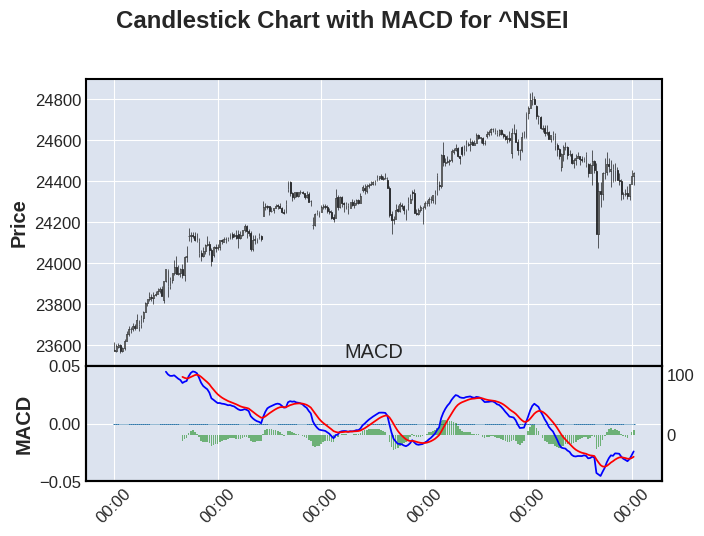

In [68]:
# Create additional plots with correct column names
macd_plot = mpf.make_addplot(data['MACD_12_26_9'], panel=1, color='blue', title='MACD')
signal_plot = mpf.make_addplot(data['MACDs_12_26_9'], panel=1, color='red')
histogram_plot = mpf.make_addplot(data['MACDh_12_26_9'], panel=1, type='bar', color='green', alpha=0.5)

# Plot candlestick chart with MACD
mpf.plot(data, type='candle', addplot=[macd_plot, signal_plot, histogram_plot], volume=True, title=f'Candlestick Chart with MACD for {ticker}', ylabel='Price', ylabel_lower='MACD')

In [69]:
# all indicater function together Check it once
def indicators(data):
    # moving avg
    data["20_ma"]=data["Close"].rolling(window=20).mean()
    #bolinger band
    data['UB'] = data['20_ma'] + 2 * data['Close'].rolling(window=20).std()
    data['LB'] = data['20_ma'] - 2 * data['Close'].rolling(window=20).std()
    #super trend
    s_t = ta.supertrend(data['High'],data['Low'],data['Close'],length=10,multiplier=3)
    data= pd.concat([data,s_t["SUPERT_10_3.0"]],axis=1)
    #relative strength index
    data['RSI'] = ta.rsi(data['Close'])
    #MACD
    macd = ta.macd(data['Close'])
    data = data.join(macd)
    return data


